ts1 = [0. 0. 0. ... 0. 0. 0.]
ts2 = [0. 0. 0. ... 0. 0. 0.]
ts3 = [0. 0. 0. ... 0. 0. 0.]


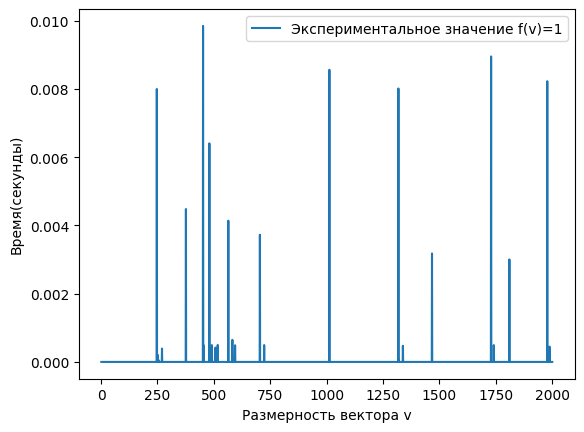

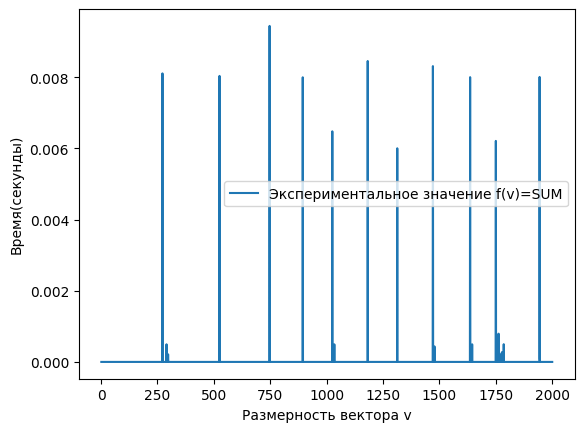

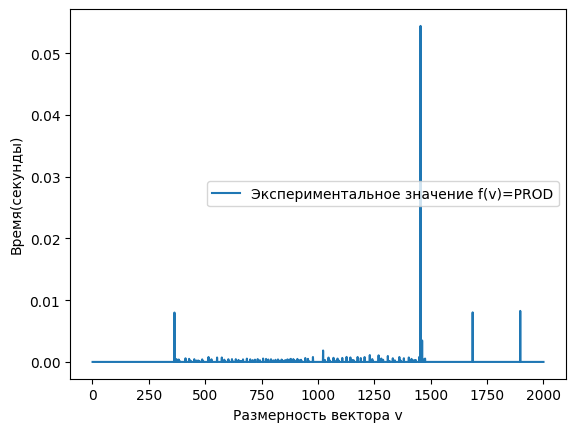

In [2]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
  
time_stamp_0 = datetime.datetime.now().timestamp()
N = 2000
n = np.linspace(1, N, N)
arr = np.array([])
for i in range(0, N):
    arr = np.append(arr, np.random.sample(1))
time_stamp_01 = datetime.datetime.now().timestamp()
# print("Вектор:", arr)
# print("Время создание вектора:", time_stamp_01-time_stamp_0)


# f(v)=const
ts1 = np.array([])
time_stamp_1 = np.array([datetime.datetime.now().timestamp()])
for k in range(1, N+1):
    arr1 = np.random.sample(k)
    arr1.fill(1)
    # for i in range(0, k):
    #     arr1[i] = 1
    time_stamp_1 = np.append(time_stamp_1, datetime.datetime.now().timestamp())
    ts1 = np.append(ts1, time_stamp_1[k]-time_stamp_1[k-1])
print('ts1 =', ts1)

fig, ax = plt.subplots()
ax.plot(n, ts1, label = 'Экспериментальное значение f(v)=1')
ax.set_xlabel('Размерность вектора v')
ax.set_ylabel('Время(секунды)')
ax.legend()

# f(v)=SUM
ts2 = np.array([])
sum_arr2 = 0
time_stamp_2 = np.array([datetime.datetime.now().timestamp()])
for k in range(1, N+1):
    arr2 = np.random.sample(k)
    sum_arr2 = np.sum(arr2)
    # for i in range(0, k):
    #     sum_arr2 = sum_arr2 + arr2[i]
    time_stamp_2 = np.append(time_stamp_2, datetime.datetime.now().timestamp())
    ts2 = np.append(ts2, time_stamp_2[k]-time_stamp_2[k-1])
print('ts2 =', ts2)

fig, ax = plt.subplots()
ax.plot(n, ts2, label = 'Экспериментальное значение f(v)=SUM')
ax.set_xlabel('Размерность вектора v')
ax.set_ylabel('Время(секунды)')
ax.legend()

# f(v)=PROD
ts3 = np.array([])
prod_arr3 = 1
time_stamp_3 = np.array([datetime.datetime.now().timestamp()])
for k in range(1, N+1):
    arr3 = np.random.sample(k)
    prod_arr3 = np.prod(arr3)
    # for i in range(0, k):
    #     prod_arr3 = prod_arr3 * arr3[i]
    time_stamp_3 = np.append(time_stamp_3, datetime.datetime.now().timestamp())
    ts3 = np.append(ts3, time_stamp_3[k]-time_stamp_3[k-1])
print('ts3 =', ts3)

fig, ax = plt.subplots()
ax.plot(n, ts3, label = 'Экспериментальное значение f(v)=PROD')
ax.set_xlabel('Размерность вектора v')
ax.set_ylabel('Время(секунды)')
ax.legend()

#bubble_sort
ts5 = np.array([])
prod_arr5 = 1
time_stamp_5 = np.array([datetime.datetime.now().timestamp()])
def bubble_sort(arr):
    def swap(i, j):
        arr[i], arr[j] = arr[j], arr[i]

    n = len(arr)
    swapped = True

    x = -1
    while swapped:
        swapped = False
        x = x + 1
        for i in range(1, n-x):
            if arr[i - 1] > arr[i]:
                swap(i - 1, i)
                swapped = True

#quick_sort
def partition(array, begin, end):
    pivot_idx = begin
    for i in xrange(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot_idx += 1
            array[i], array[pivot_idx] = array[pivot_idx], array[i]
    array[pivot_idx], array[begin] = array[begin], array[pivot_idx]
    return pivot_idx

def quick_sort_recursion(array, begin, end):
    if begin >= end:
        return
    pivot_idx = partition(array, begin, end)
    quick_sort_recursion(array, begin, pivot_idx-1)
    quick_sort_recursion(array, pivot_idx+1, end)

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1

    return quick_sort_recursion(array, begin, end)

#timsort
MIN_MERGE = 32


def calcMinRun(n):
    """Returns the minimum length of a
    run from 23 - 64 so that
    the len(array)/minrun is less than or
    equal to a power of 2.

    e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,
    ..., 127=>64, 128=>32, ...
    """
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r


# This function sorts array from left index to
# to right index which is of size atmost RUN
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1


# Merge function merges the sorted runs
def merge(arr, l, m, r):

    # original array is broken in two parts
    # left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])

    i, j, k = 0, 0, l

    # after comparing, we merge those two array
    # in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1

        else:
            arr[k] = right[j]
            j += 1

        k += 1

    # Copy remaining elements of left, if any
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1

    # Copy remaining element of right, if any
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1


# Iterative Timsort function to sort the
# array[0...n-1] (similar to merge sort)
def timSort(arr):
    n = len(arr)
    minRun = calcMinRun(n)

    # Sort individual subarrays of size RUN
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)

    # Start merging from size RUN (or 32). It will merge
    # to form size 64, then 128, 256 and so on ....
    size = minRun
    while size < n:

        # Pick starting point of left sub array. We
        # are going to merge arr[left..left+size-1]
        # and arr[left+size, left+2*size-1]
        # After every merge, we increase left by 2*size
        for left in range(0, n, 2 * size):

            # Find ending point of left sub array
            # mid+1 is starting point of right sub array
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))

            # Merge sub array arr[left.....mid] &
            # arr[mid+1....right]
            if mid < right:
                merge(arr, left, mid, right)

        size = 2 * size